#   Booking Cancellation Prediction Analysis

**Overview**

This notebook presents a comprehensive analysis and predictive modeling workflow to understand and predict booking cancellations using flight booking data. The primary goal is to identify key factors contributing to cancellations and build a model that accurately predicts whether a booking will be completed or cancelled.

**Data Card**


- `num_passengers` = number of passengers travelling
- `sales_channel` = sales channel booking was made on
- `trip_type` = trip Type (Round Trip, One Way, Circle Trip)
- `purchase_lead` = number of days between travel date and booking date
- `length_of_stay` = number of days spent at destination
- `flight_hour` = hour of flight departure
- `flight_day` = day of week of flight departure
- `route` = origin -> destination flight route
- `booking_origin` = country from where booking was made
- `wants_extra_baggage` = if the customer wanted extra baggage in the booking
- `wants_preferred_seat` = if the customer wanted a preferred seat in the booking
- `wants_in_flight_meals` = if the customer wanted in-flight meals in the booking
- `flight_duration` = total duration of flight (in hours)
- `booking_complete` = flag indicating if the customer completed the booking

***

#  About the Author

**👤 Name:** Muhammad Umer  
**🔗 LinkedIn:** [https://www.linkedin.com/in/therealumerhayat/](https://www.linkedin.com/in/therealumerhayat/)  
**📧 Gmail:** umerhayat282@gmail.com  
**📞 Contact Number:** +92 302 9854427 / +92 317 6239577

****

# 1. Import Liabraries and dataset

In [150]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report


from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report


In [2]:
df = pd.read_csv(r"D:\british_airways_data_scraping_&_data_analysis_project\customer_booking (1).csv", encoding="ISO-8859-1")

In [3]:
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

In [5]:
df.isnull().sum()

num_passengers           0
sales_channel            0
trip_type                0
purchase_lead            0
length_of_stay           0
flight_hour              0
flight_day               0
route                    0
booking_origin           0
wants_extra_baggage      0
wants_preferred_seat     0
wants_in_flight_meals    0
flight_duration          0
booking_complete         0
dtype: int64

In [6]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,1.000000,1.000000,1.000000,9.500000,1.000000


lets encode the flight_day column to see summary statistics clearly

In [7]:
df['flight_day'].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [8]:
day_dict = {'Mon': 1, 'Tue': 2, 'Wed': 3, 'Thu': 4, 'Fri': 5, 'Sat': 6, 'Sun': 7}

df['flight_day'] = df['flight_day'].map(day_dict)
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,6,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,6,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,3,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,6,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,3,AKLDEL,India,1,0,1,5.52,0


In [9]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,3.814420,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,1.992792,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,1.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,2.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,4.000000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,5.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,7.000000,1.000000,1.000000,1.000000,9.500000,1.000000


****

#   2. Comprehensive EDA

In [15]:
#compare the sales channel with the number of passengers
df.groupby(['sales_channel','num_passengers'])['num_passengers'].count()


sales_channel  num_passengers
Internet       1                 27794
               2                 11426
               3                  2556
               4                  1617
               5                   495
               6                   254
               7                   101
               8                    77
               9                    62
Mobile         1                  3558
               2                  1378
               3                   385
               4                   167
               5                    66
               6                    35
               7                    13
               8                    12
               9                     4
Name: num_passengers, dtype: int64

Most of the bookings from the internet

In [19]:
df['booking_complete'].value_counts() / len(df) * 100

booking_complete
0    85.044
1    14.956
Name: count, dtype: float64

Approximately 85% booking cancelled.

In [38]:
cancellation_rate = (
    df.groupby('sales_channel')['booking_complete']
    .apply(lambda x: (x==0).mean())
    .reset_index(name='cancellation_rate')
)


In [39]:
print(cancellation_rate)

  sales_channel  cancellation_rate
0      Internet           0.845230
1        Mobile           0.891598


it is surprising to see that even if we have higher number of internet booking despite this fact Mobile booking has higher cancellation rate. 

We have to find the reason behind the cancellation let check there may be correlation of that columns to the cancellation

lets see these three column that i suspect


- 'wants_extra_baggage'
- 'wants_preferred_seat'	
- 'wants_in_flight_meals'

In [41]:
df['wants_extra_baggage'].unique()

array([1, 0], dtype=int64)

In [43]:
df['wants_extra_baggage'].value_counts() / len(df) * 100

wants_extra_baggage
1    66.878
0    33.122
Name: count, dtype: float64

About 66% Customer Wants Extra baggage facicility

In [68]:
result = df.groupby('booking_complete')['wants_extra_baggage'].apply(lambda x: (x == 1).mean()).reset_index()
result.columns = ['booking_complete', 'percentage_want_extra_baggage']
print(result)


   booking_complete  percentage_want_extra_baggage
0                 0                       0.655331
1                 1                       0.745253


In [69]:
for _, row in result.iterrows():
    print(f"Booking complete = {row['booking_complete']}: Percentage wanting extra baggage = {row['percentage_want_extra_baggage']*100:.1f}%")


Booking complete = 0.0: Percentage wanting extra baggage = 65.5%
Booking complete = 1.0: Percentage wanting extra baggage = 74.5%


- The 74.5% corresponds to those who completed booking, not cancelled.
- The 65.5% corresponds to those who cancelled.

In [65]:
# Filter cancelled bookings
cancelled = df[df['booking_complete'] == 0]

# Calculate percentage of cancelled bookings where wants_preferred_seat == 1
percentage = (cancelled['wants_preferred_seat'] == 1).mean()

print(f"Percentage of cancelled bookings due to wanting preferred seat: {percentage:.2%}")


Percentage of cancelled bookings due to wanting preferred seat: 28.74%


In [66]:
result = df.groupby('booking_complete')['wants_preferred_seat'].apply(lambda x: (x == 1).mean()).reset_index()
result.columns = ['booking_complete', 'percentage_want_preferred_seat']
print(result)


   booking_complete  percentage_want_preferred_seat
0                 0                        0.287357
1                 1                        0.351565


In [71]:
df['wants_in_flight_meals'].value_counts()

wants_in_flight_meals
0    28643
1    21357
Name: count, dtype: int64

In [84]:
df.groupby('booking_complete')['wants_in_flight_meals'].apply(lambda x: (x == 1).mean()).reset_index()

,booking_complete,wants_in_flight_meals
0,0,0.421641
1,1,0.458411


In [85]:
#lets check if there are person most of them belongs to oneway trip or round trip
df['trip_type'].unique()

array(['RoundTrip', 'CircleTrip', 'OneWay'], dtype=object)

In [87]:
# Count bookings by completion and trip type
booking_summary = df.groupby(['booking_complete', 'trip_type']).size().reset_index(name='count')
booking_summary

,booking_complete,trip_type,count
0,0,CircleTrip,111
1,0,OneWay,367
2,0,RoundTrip,42044
3,1,CircleTrip,5
4,1,OneWay,20
5,1,RoundTrip,7453


In [88]:
total_per_trip = df.groupby('trip_type').size().reset_index(name='total')
booking_summary = booking_summary.merge(total_per_trip, on='trip_type')
booking_summary['percentage'] = booking_summary['count'] / booking_summary['total']

print(booking_summary)

   booking_complete   trip_type  count  total  percentage
0                 0  CircleTrip    111    116    0.956897
1                 0      OneWay    367    387    0.948320
2                 0   RoundTrip  42044  49497    0.849425
3                 1  CircleTrip      5    116    0.043103
4                 1      OneWay     20    387    0.051680
5                 1   RoundTrip   7453  49497    0.150575


In [89]:
# Filter cancelled bookings
cancelled = df[df['booking_complete'] == 0]

# Calculate percentage of cancelled bookings wanting extra baggage by trip type
extra_baggage_cancelled = (
    cancelled.groupby('trip_type')['wants_extra_baggage']
    .apply(lambda x: (x == 1).mean())
    .reset_index(name='percentage_want_extra_baggage')
)

print(extra_baggage_cancelled)


    trip_type  percentage_want_extra_baggage
0  CircleTrip                       0.810811
1      OneWay                       0.702997
2   RoundTrip                       0.654505


- Most bookings are cancelled across all trip types, especially in RoundTrip (about 85% cancellations).
- CircleTrip and OneWay have very high cancellation rates (~95%).
- A large proportion of cancelled bookings wanted extra baggage:
  
    -  CircleTrip: ~81%
    -  OneWay: ~70%
    -  RoundTrip: ~65%


- Wanting extra baggage is highly prevalent among cancellations, especially for CircleTrip and OneWay.
- Extra baggage preference might be a significant factor contributing to booking cancellations, particularly in CircleTrip bookings.

In [90]:
# Group by booking_complete and get descriptive stats of purchase_lead
lead_stats = df.groupby('booking_complete')['purchase_lead'].describe()

print(lead_stats)


                    count       mean        std  min   25%   50%    75%    max
booking_complete                                                              
0                 42522.0  85.779926  90.534130  0.0  22.0  52.0  117.0  704.0
1                  7478.0  80.167157  89.836401  0.0  18.0  46.0  106.0  867.0


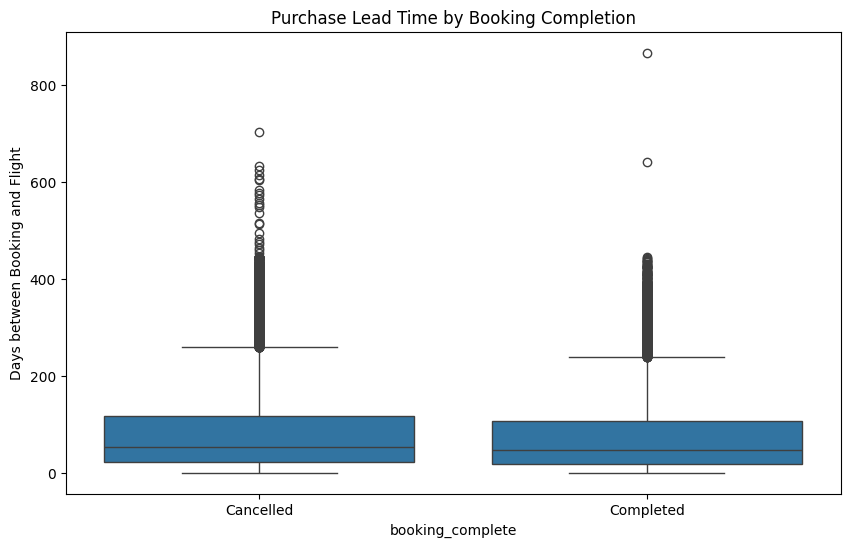

In [92]:
plt.figure(figsize=(10,6))
sns.boxplot(x='booking_complete', y='purchase_lead', data=df)
plt.xticks([0,1], ['Cancelled', 'Completed'])
plt.title('Purchase Lead Time by Booking Completion')
plt.ylabel('Days between Booking and Flight')
plt.show()

In [93]:
# Create bins for purchase_lead (e.g., weekly or monthly)
df['lead_bin'] = pd.cut(df['purchase_lead'], bins=[0,7,14,30,60,90,180,365,1000], right=False)

# Calculate cancellation rate per bin
cancellation_by_lead = df.groupby('lead_bin')['booking_complete'].apply(lambda x: (x == 0).mean()).reset_index()
cancellation_by_lead.columns = ['purchase_lead_bin', 'cancellation_rate']

print(cancellation_by_lead)


  purchase_lead_bin  cancellation_rate
0            [0, 7)           0.829222
1           [7, 14)           0.820971
2          [14, 30)           0.845367
3          [30, 60)           0.847947
4          [60, 90)           0.864572
5         [90, 180)           0.866125
6        [180, 365)           0.856943
7       [365, 1000)           0.862353


C:\Users\abc\AppData\Local\Temp\ipykernel_22912\1369693601.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cancellation_by_lead = df.groupby('lead_bin')['booking_complete'].apply(lambda x: (x == 0).mean()).reset_index()


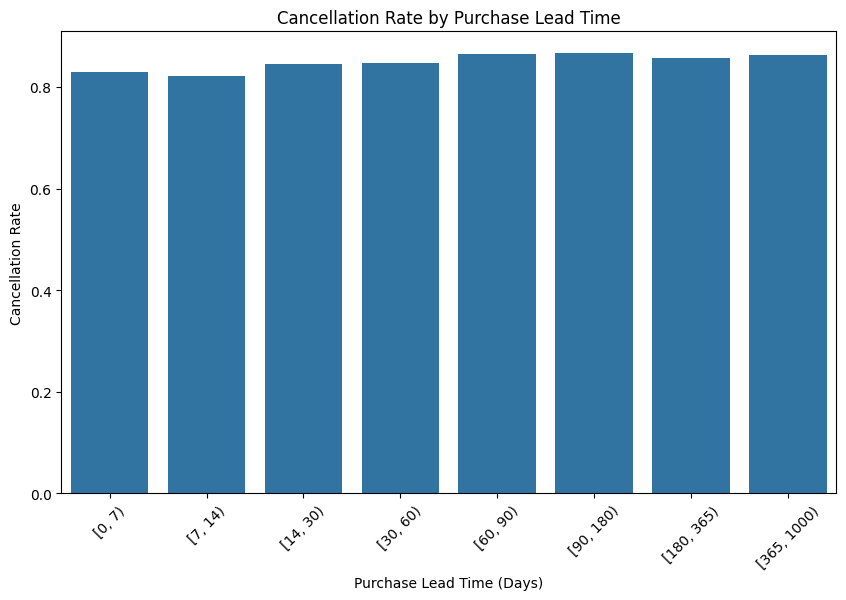

In [94]:
plt.figure(figsize=(10,6))
sns.barplot(x='purchase_lead_bin', y='cancellation_rate', data=cancellation_by_lead)
plt.xticks(rotation=45)
plt.title('Cancellation Rate by Purchase Lead Time')
plt.ylabel('Cancellation Rate')
plt.xlabel('Purchase Lead Time (Days)')
plt.show()


- Cancellation rates are consistently high across all purchase lead time intervals, ranging roughly from 82% to 87%.

- There is a slight upward trend in cancellation rate as the purchase lead time increases from 0 to around 180 days:

    - From about 82.9% cancellations in the first week ([0, 7) days),

    - Increasing to around 86.6% cancellations in the 90-180 day range.

- After 180 days, the cancellation rate slightly fluctuates but remains high (~85-86%).

- Longer purchase lead times tend to be associated with marginally higher cancellation rates, but the difference is relatively small (about 4% increase from shortest to longest lead times).

In [98]:
df['route'].value_counts().head(20)

route
AKLKUL    2680
PENTPE     924
MELSGN     842
ICNSIN     801
DMKKIX     744
ICNSYD     695
DMKPER     679
DPSICN     666
DMKOOL     655
MELPEN     649
MELTPE     644
SGNSYD     614
DMKSYD     532
COKSYD     511
COKMEL     474
CMBMEL     465
HNDPEN     442
PENPER     437
DPSPVG     417
CGKICN     414
Name: count, dtype: int64

In [99]:
route_trip_counts = df.groupby(['trip_type', 'route']).size().reset_index(name='flight_count')
max_route_per_trip = route_trip_counts.loc[route_trip_counts.groupby('trip_type')['flight_count'].idxmax()]

for _, row in max_route_per_trip.iterrows():
    print(f"Trip type '{row['trip_type']}' has the highest flights on route '{row['route']}' with {row['flight_count']} flights.")


Trip type 'CircleTrip' has the highest flights on route 'ICNSYD' with 9 flights.
Trip type 'OneWay' has the highest flights on route 'ICNSYD' with 32 flights.
Trip type 'RoundTrip' has the highest flights on route 'AKLKUL' with 2660 flights.


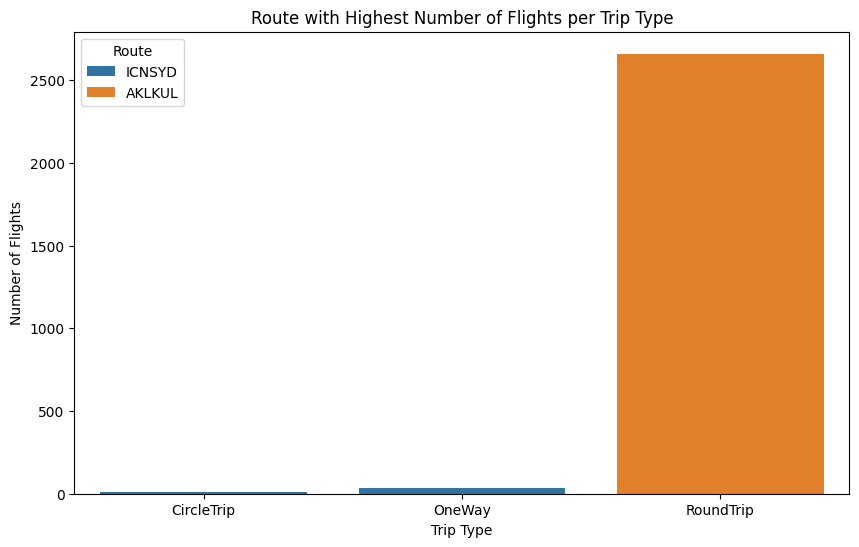

In [110]:
route_trip_counts = df.groupby(['trip_type', 'route']).size().reset_index(name='flight_count')
max_route_per_trip = route_trip_counts.loc[route_trip_counts.groupby('trip_type')['flight_count'].idxmax()]

plt.figure(figsize=(10,6))
sns.barplot(data=max_route_per_trip, x='trip_type', y='flight_count', hue='route')
plt.title('Route with Highest Number of Flights per Trip Type')
plt.ylabel('Number of Flights')
plt.xlabel('Trip Type')
plt.legend(title='Route')
plt.show()

In [103]:
flights_per_day = df.groupby('flight_day').size().reset_index(name='flight_count')
max_day = flights_per_day.loc[flights_per_day['flight_count'].idxmax()]

print(f"The day with the most flights is '{max_day['flight_day']}' with {max_day['flight_count']} flights. Means Monday")


The day with the most flights is '1' with 8102 flights. Means Monday


C:\Users\abc\AppData\Local\Temp\ipykernel_22912\1963538536.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=flights_per_day, x='flight_day', y='flight_count', palette='viridis')


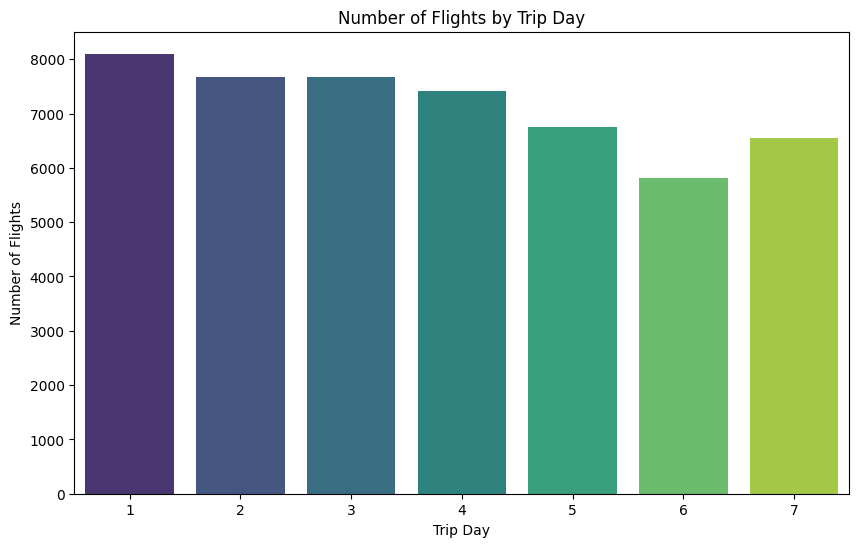

In [112]:
flights_per_day = df.groupby('flight_day').size().reset_index(name='flight_count')

plt.figure(figsize=(10,6))
sns.barplot(data=flights_per_day, x='flight_day', y='flight_count', palette='viridis')
plt.title('Number of Flights by Trip Day')
plt.xlabel('Trip Day')
plt.ylabel('Number of Flights')
plt.show()


In [105]:
route_day_counts = df.groupby(['route', 'flight_day']).size().reset_index(name='flight_count')
max_route_day = route_day_counts.loc[route_day_counts['flight_count'].idxmax()]

print(f"The route '{max_route_day['route']}' on day '{max_route_day['flight_day']}' has the highest number of flights: {max_route_day['flight_count']}. Means On Sunday")


The route 'AKLKUL' on day '7' has the highest number of flights: 463. Means On Sunday


In [106]:
route_cancellation = df.groupby('route')['booking_complete'].apply(lambda x: (x == 0).mean()).reset_index(name='cancellation_rate')
max_cancel_route = route_cancellation.loc[route_cancellation['cancellation_rate'].idxmax()]

print(f"The route with the highest cancellation rate is '{max_cancel_route['route']}' with a cancellation rate of {max_cancel_route['cancellation_rate']:.2%}.")


The route with the highest cancellation rate is 'AKLDEL' with a cancellation rate of 100.00%.


In [109]:
day_cancellation = df.groupby('flight_day')['booking_complete'].apply(lambda x: (x == 0).mean()).reset_index(name='cancellation_rate')
max_cancel_day = day_cancellation.loc[day_cancellation['cancellation_rate'].idxmax()]

print(f"The day with the highest cancellation rate is '{max_cancel_day['flight_day']}' with a cancellation rate of {max_cancel_day['cancellation_rate']:.2%}. On Sunday")


The day with the highest cancellation rate is '7.0' with a cancellation rate of 85.86%. On Sunday


C:\Users\abc\AppData\Local\Temp\ipykernel_22912\1488101766.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature, y='cancellation_rate', data=cancellation_rates, palette='coolwarm')


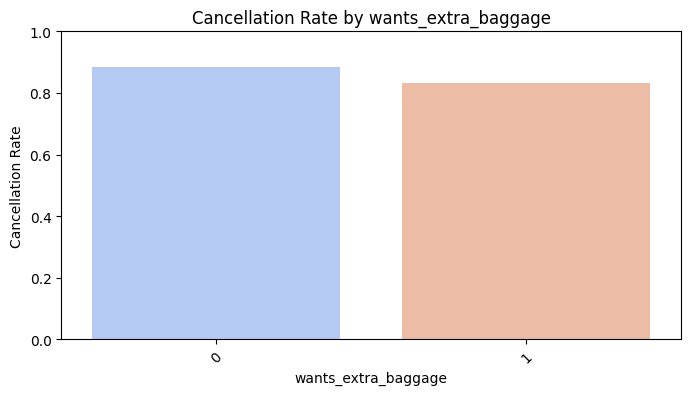

C:\Users\abc\AppData\Local\Temp\ipykernel_22912\1488101766.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature, y='cancellation_rate', data=cancellation_rates, palette='coolwarm')


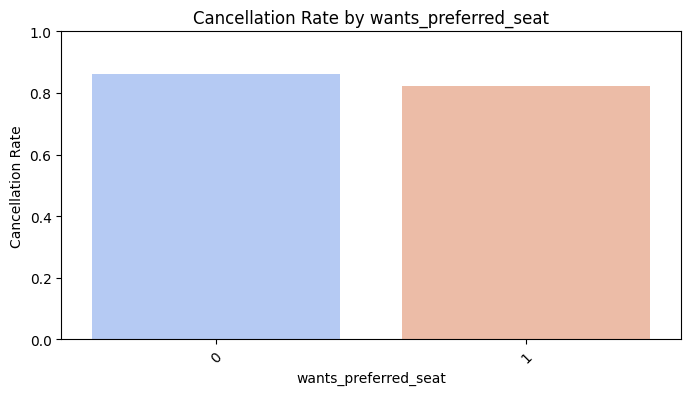

C:\Users\abc\AppData\Local\Temp\ipykernel_22912\1488101766.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature, y='cancellation_rate', data=cancellation_rates, palette='coolwarm')


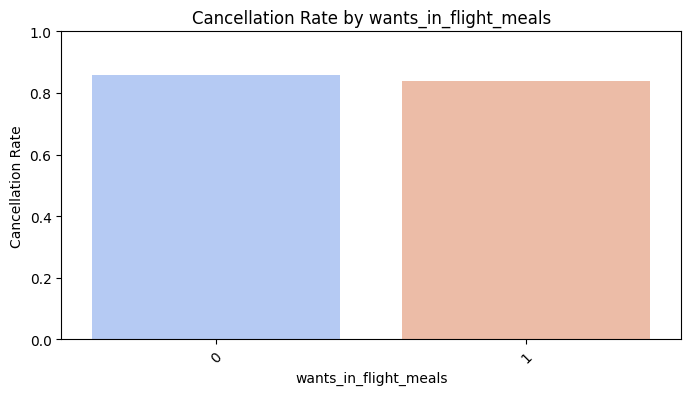

C:\Users\abc\AppData\Local\Temp\ipykernel_22912\1488101766.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature, y='cancellation_rate', data=cancellation_rates, palette='coolwarm')


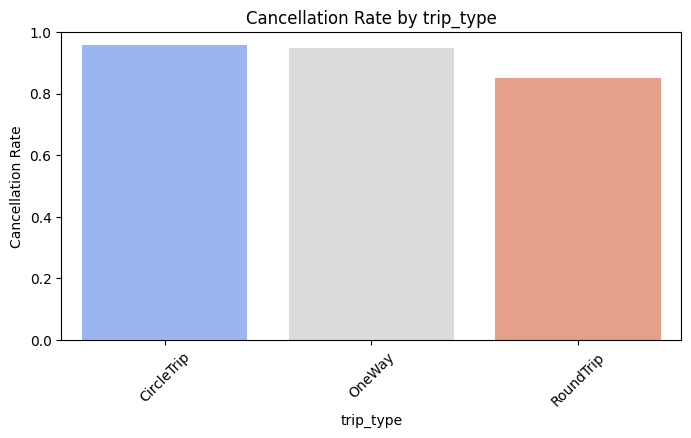

C:\Users\abc\AppData\Local\Temp\ipykernel_22912\1488101766.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature, y='cancellation_rate', data=cancellation_rates, palette='coolwarm')


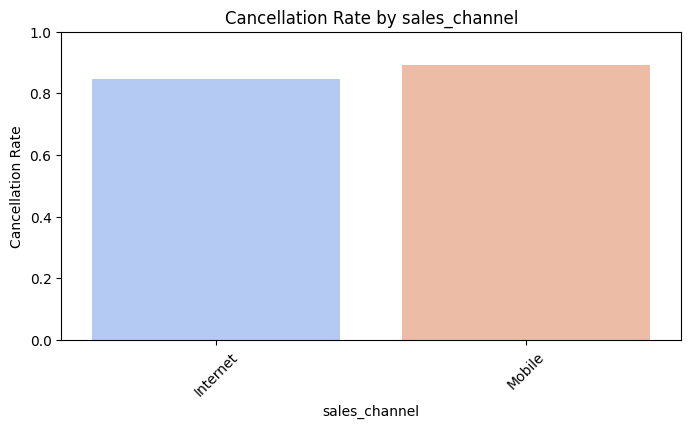

C:\Users\abc\AppData\Local\Temp\ipykernel_22912\1488101766.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature, y='cancellation_rate', data=cancellation_rates, palette='coolwarm')


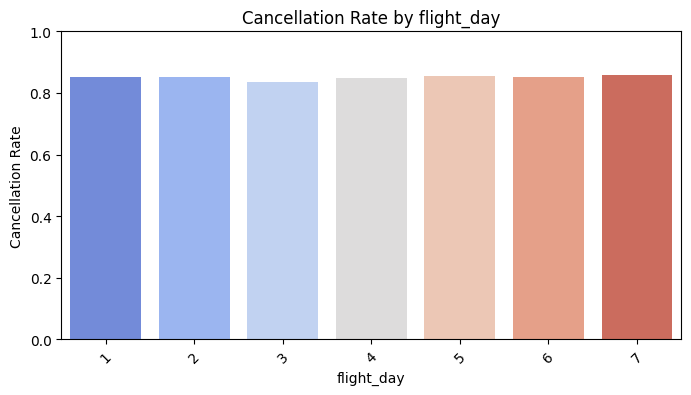

In [120]:
# Calculate cancellation rate by categorical features
features = ['wants_extra_baggage', 'wants_preferred_seat', 'wants_in_flight_meals', 
            'trip_type', 'sales_channel', 'flight_day']

for feature in features:
    cancellation_rates = df.groupby(feature)['booking_complete'].apply(lambda x: (x == 0).mean()).reset_index()
    cancellation_rates.columns = [feature, 'cancellation_rate']
    
    plt.figure(figsize=(8,4))
    sns.barplot(x=feature, y='cancellation_rate', data=cancellation_rates, palette='coolwarm')
    plt.title(f'Cancellation Rate by {feature}')
    plt.ylabel('Cancellation Rate')
    plt.xlabel(feature)
    plt.xticks(rotation=45)
    plt.ylim(0,1)
    plt.show()

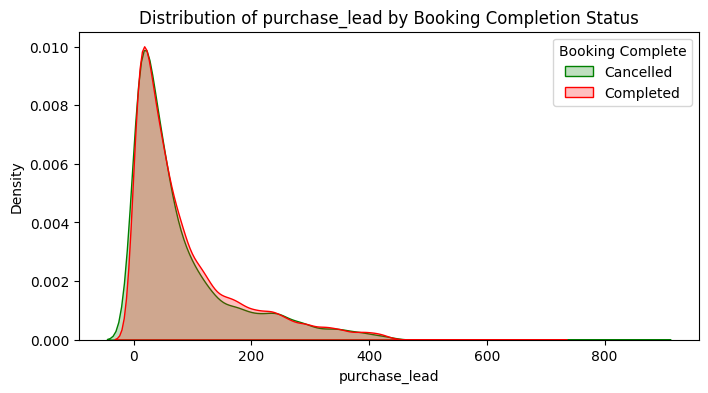

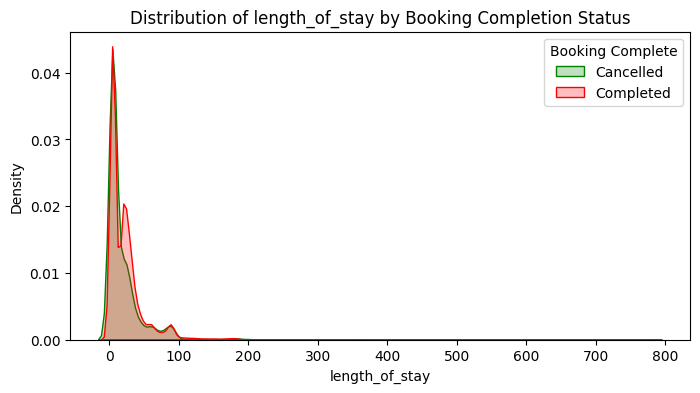

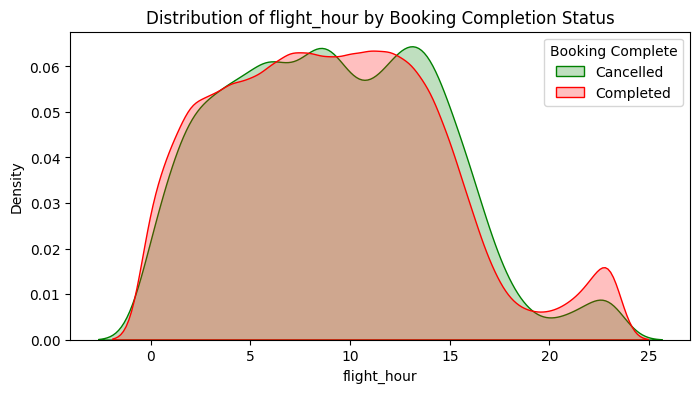

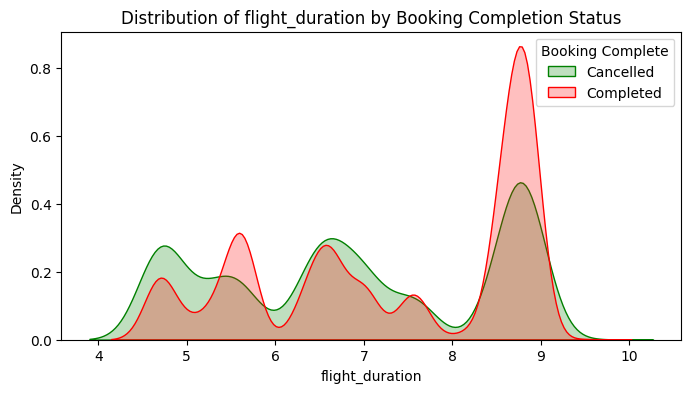

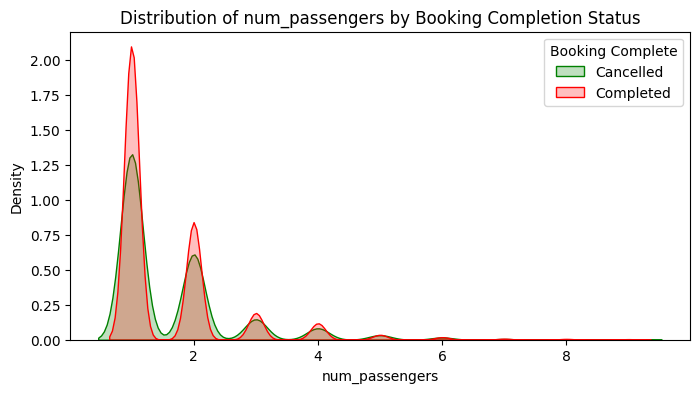

In [121]:
numerical_features = ['purchase_lead', 'length_of_stay', 'flight_hour', 'flight_duration', 'num_passengers']

for feature in numerical_features:
    plt.figure(figsize=(8,4))
    sns.kdeplot(data=df, x=feature, hue='booking_complete', common_norm=False, fill=True, palette=['red','green'])
    plt.title(f'Distribution of {feature} by Booking Completion Status')
    plt.xlabel(feature)
    plt.ylabel('Density')
    plt.legend(title='Booking Complete', labels=['Cancelled', 'Completed'])
    plt.show()


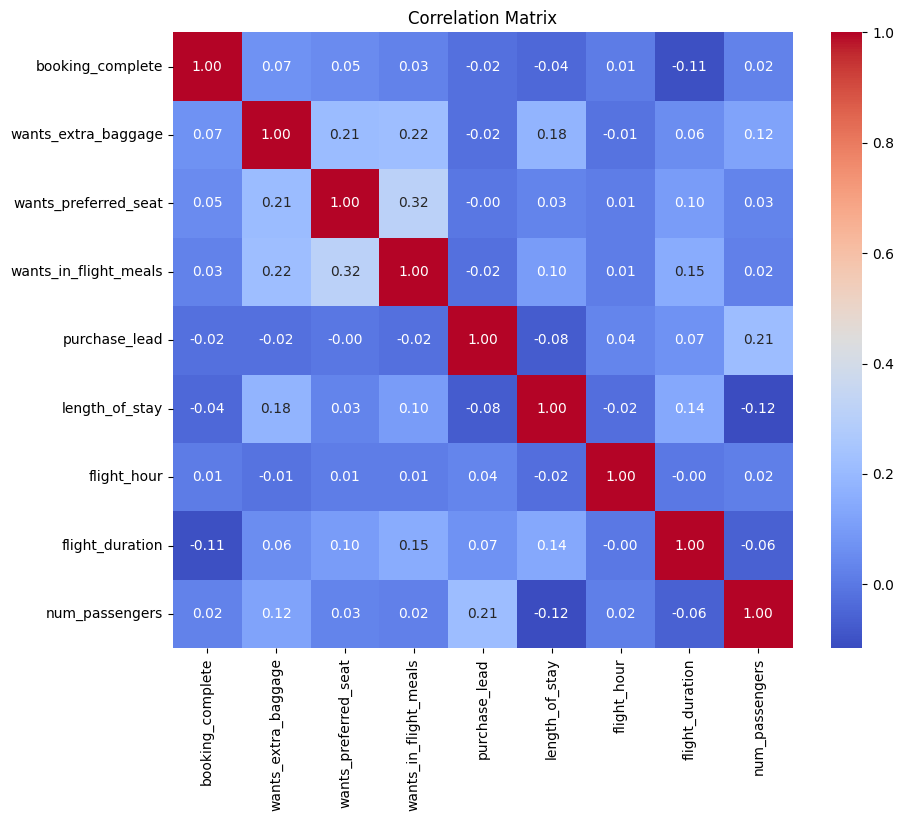

In [122]:
# Convert booking_complete to numeric if not already (0 or 1)
df['booking_complete'] = df['booking_complete'].astype(int)

# Select relevant numeric columns for correlation
corr_features = ['booking_complete', 'wants_extra_baggage', 'wants_preferred_seat', 'wants_in_flight_meals',
                 'purchase_lead', 'length_of_stay', 'flight_hour', 'flight_duration', 'num_passengers']

corr = df[corr_features].corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


****

#   3. Model Building

In [124]:
# Prepare data
df_model = df.copy()

In [125]:
# Encode categorical variables
categorical_cols = ['trip_type', 'sales_channel', 'flight_day', 'route', 'booking_origin']
for col in categorical_cols:
    df_model[col] = LabelEncoder().fit_transform(df_model[col].astype(str))

In [141]:
# Features and target
X = df_model[['num_passengers', 'wants_extra_baggage', 'wants_preferred_seat', 'wants_in_flight_meals',
              'purchase_lead', 'length_of_stay', 'flight_hour', 'flight_duration'] + categorical_cols]
y = df_model['booking_complete']

In [142]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [145]:
# Train Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [146]:
# Predict and evaluate
y_pred = rf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.99      0.92      8520
           1       0.55      0.10      0.17      1480

    accuracy                           0.85     10000
   macro avg       0.71      0.54      0.54     10000
weighted avg       0.82      0.85      0.81     10000



C:\Users\abc\AppData\Local\Temp\ipykernel_22912\1152363489.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances.values, y=importances.index, palette='viridis')


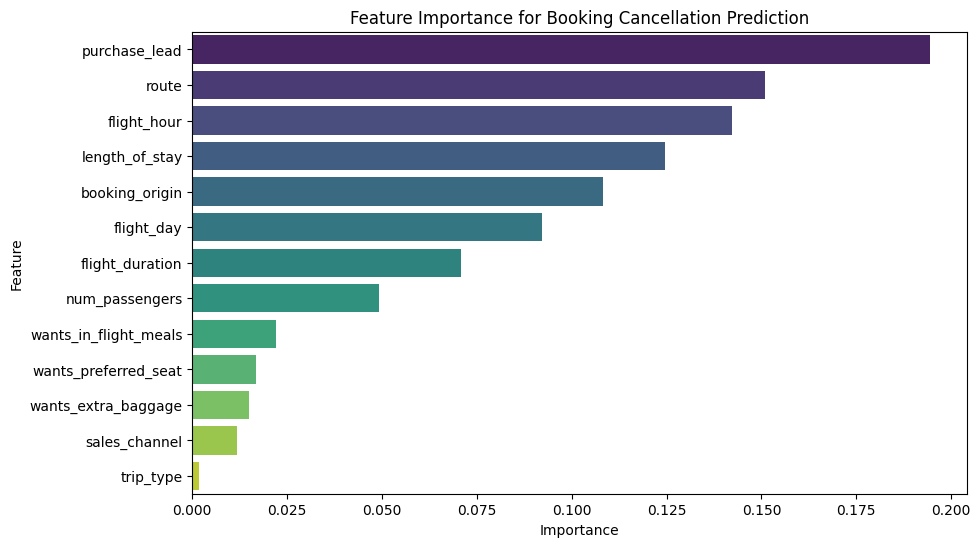

In [130]:
# Feature importance
importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=importances.values, y=importances.index, palette='viridis')
plt.title('Feature Importance for Booking Cancellation Prediction')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


In [132]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create ConfusionMatrixDisplay object for better visualization
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Cancelled (0)', 'Completed (1)'])

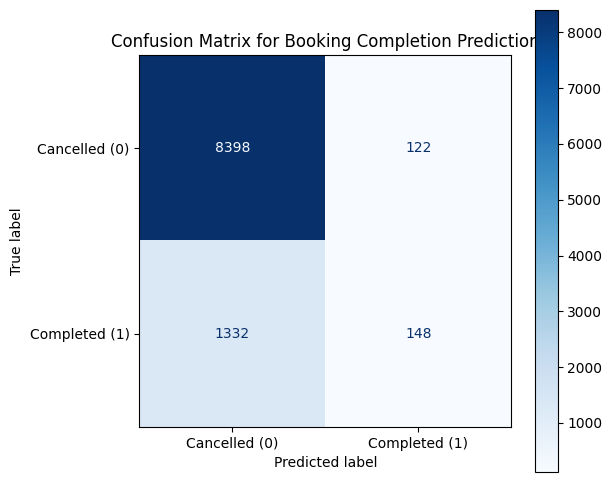

In [133]:
# Plot confusion matrix
fig, ax = plt.subplots(figsize=(6,6))
disp.plot(ax=ax, cmap=plt.cm.Blues, colorbar=True)
plt.title('Confusion Matrix for Booking Completion Prediction')
plt.show()

**Lets tune hyperparameter to if we can increase model efficiency**

In [136]:
# Set class weights to balance classes automatically
rf = RandomForestClassifier(class_weight='balanced', random_state=42)

In [137]:
# Define hyperparameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

In [138]:
grid_search = GridSearchCV(rf, param_grid, cv=3, scoring='f1_macro', n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [10, 20, None],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200]},
             scoring='f1_macro')

In [139]:
print("Best parameters:", grid_search.best_params_)

Best parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}


In [140]:
# Predict and evaluate on test set
y_pred = grid_search.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.71      0.81      8520
           1       0.30      0.71      0.42      1480

    accuracy                           0.71     10000
   macro avg       0.62      0.71      0.61     10000
weighted avg       0.84      0.71      0.75     10000



**Lets Balance the class and see the result**

In [149]:
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_res, y_train_res)

y_pred = rf.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.89      0.88      0.89      8520
           1       0.36      0.39      0.37      1480

    accuracy                           0.81     10000
   macro avg       0.62      0.63      0.63     10000
weighted avg       0.81      0.81      0.81     10000



Conclusion & Summary available in repository in Pdf slide format check the filename

- **'training and evaluation of machine learning model on customer booking dataset.pdf'**